## Exploratory Data Analysis (EDA)

+ Visualize the distribution of each feature using histograms, box plots, etc.+ 
Analyze the correlation between features and the target variable (churn)
+ 
Use scatter plots or pair plots to check for any non-linear patterns.

In [14]:
## import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder  ## for nominal and ordinal encoding

In [15]:
## load the data
eda_data = pd.read_csv('no_missing_values_customer_data.csv')
eda_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
eda_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Histograms and BoxPlots of Numerical features

In [17]:
# Strip any whitespace and convert 'TotalCharges' to numeric, coercing errors to NaN
eda_data['TotalCharges'] = pd.to_numeric(eda_data['TotalCharges'].str.strip(), errors='coerce')
# Drop rows with NaN values or handle them (e.g., replace with 0 or mean)
eda_data.dropna(subset=['TotalCharges'], inplace=True)
# Convert to 'int64'
eda_data['TotalCharges'] = eda_data['TotalCharges'].astype('int64')

# List of numerical features
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Plot histograms for numerical features
plt.figure(figsize=(15, 5))
for i, feature in enumerate(numerical_features):
    plt.subplot(1, 3, i+1)
    sns.histplot(eda_data[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Plot box plots for numerical features
plt.figure(figsize=(15, 5))
for i, feature in enumerate(numerical_features):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=eda_data[feature])
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()

AttributeError: Can only use .str accessor with string values!

### Analyze Correlation Between Features and Target Variable (Churn)

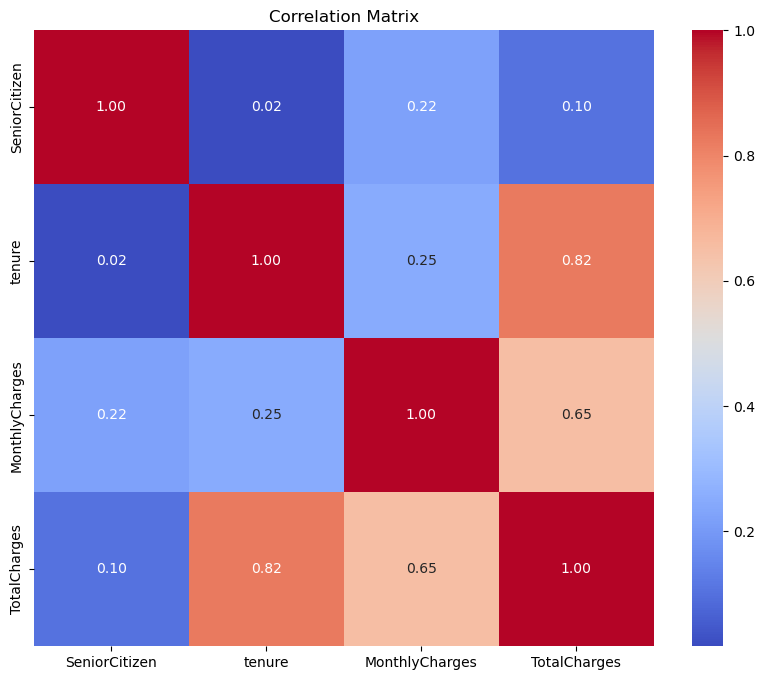

In [18]:
# Select only numeric columns for correlation
numeric_data = eda_data.select_dtypes(include=['number'])

# Compute correlation matrix for numeric columns
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### Frequency Count and Distribution Analysis
Objective: Understand the distribution of each categorical feature.

Value counts for gender:
 gender
Male      3555
Female    3488
Name: count, dtype: int64 

Value counts for Partner:
 Partner
No     3641
Yes    3402
Name: count, dtype: int64 

Value counts for Dependents:
 Dependents
No     4933
Yes    2110
Name: count, dtype: int64 

Value counts for PhoneService:
 PhoneService
Yes    6361
No      682
Name: count, dtype: int64 

Value counts for MultipleLines:
 MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64 

Value counts for InternetService:
 InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64 

Value counts for OnlineSecurity:
 OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64 

Value counts for OnlineBackup:
 OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64 

Value counts for DevicePr

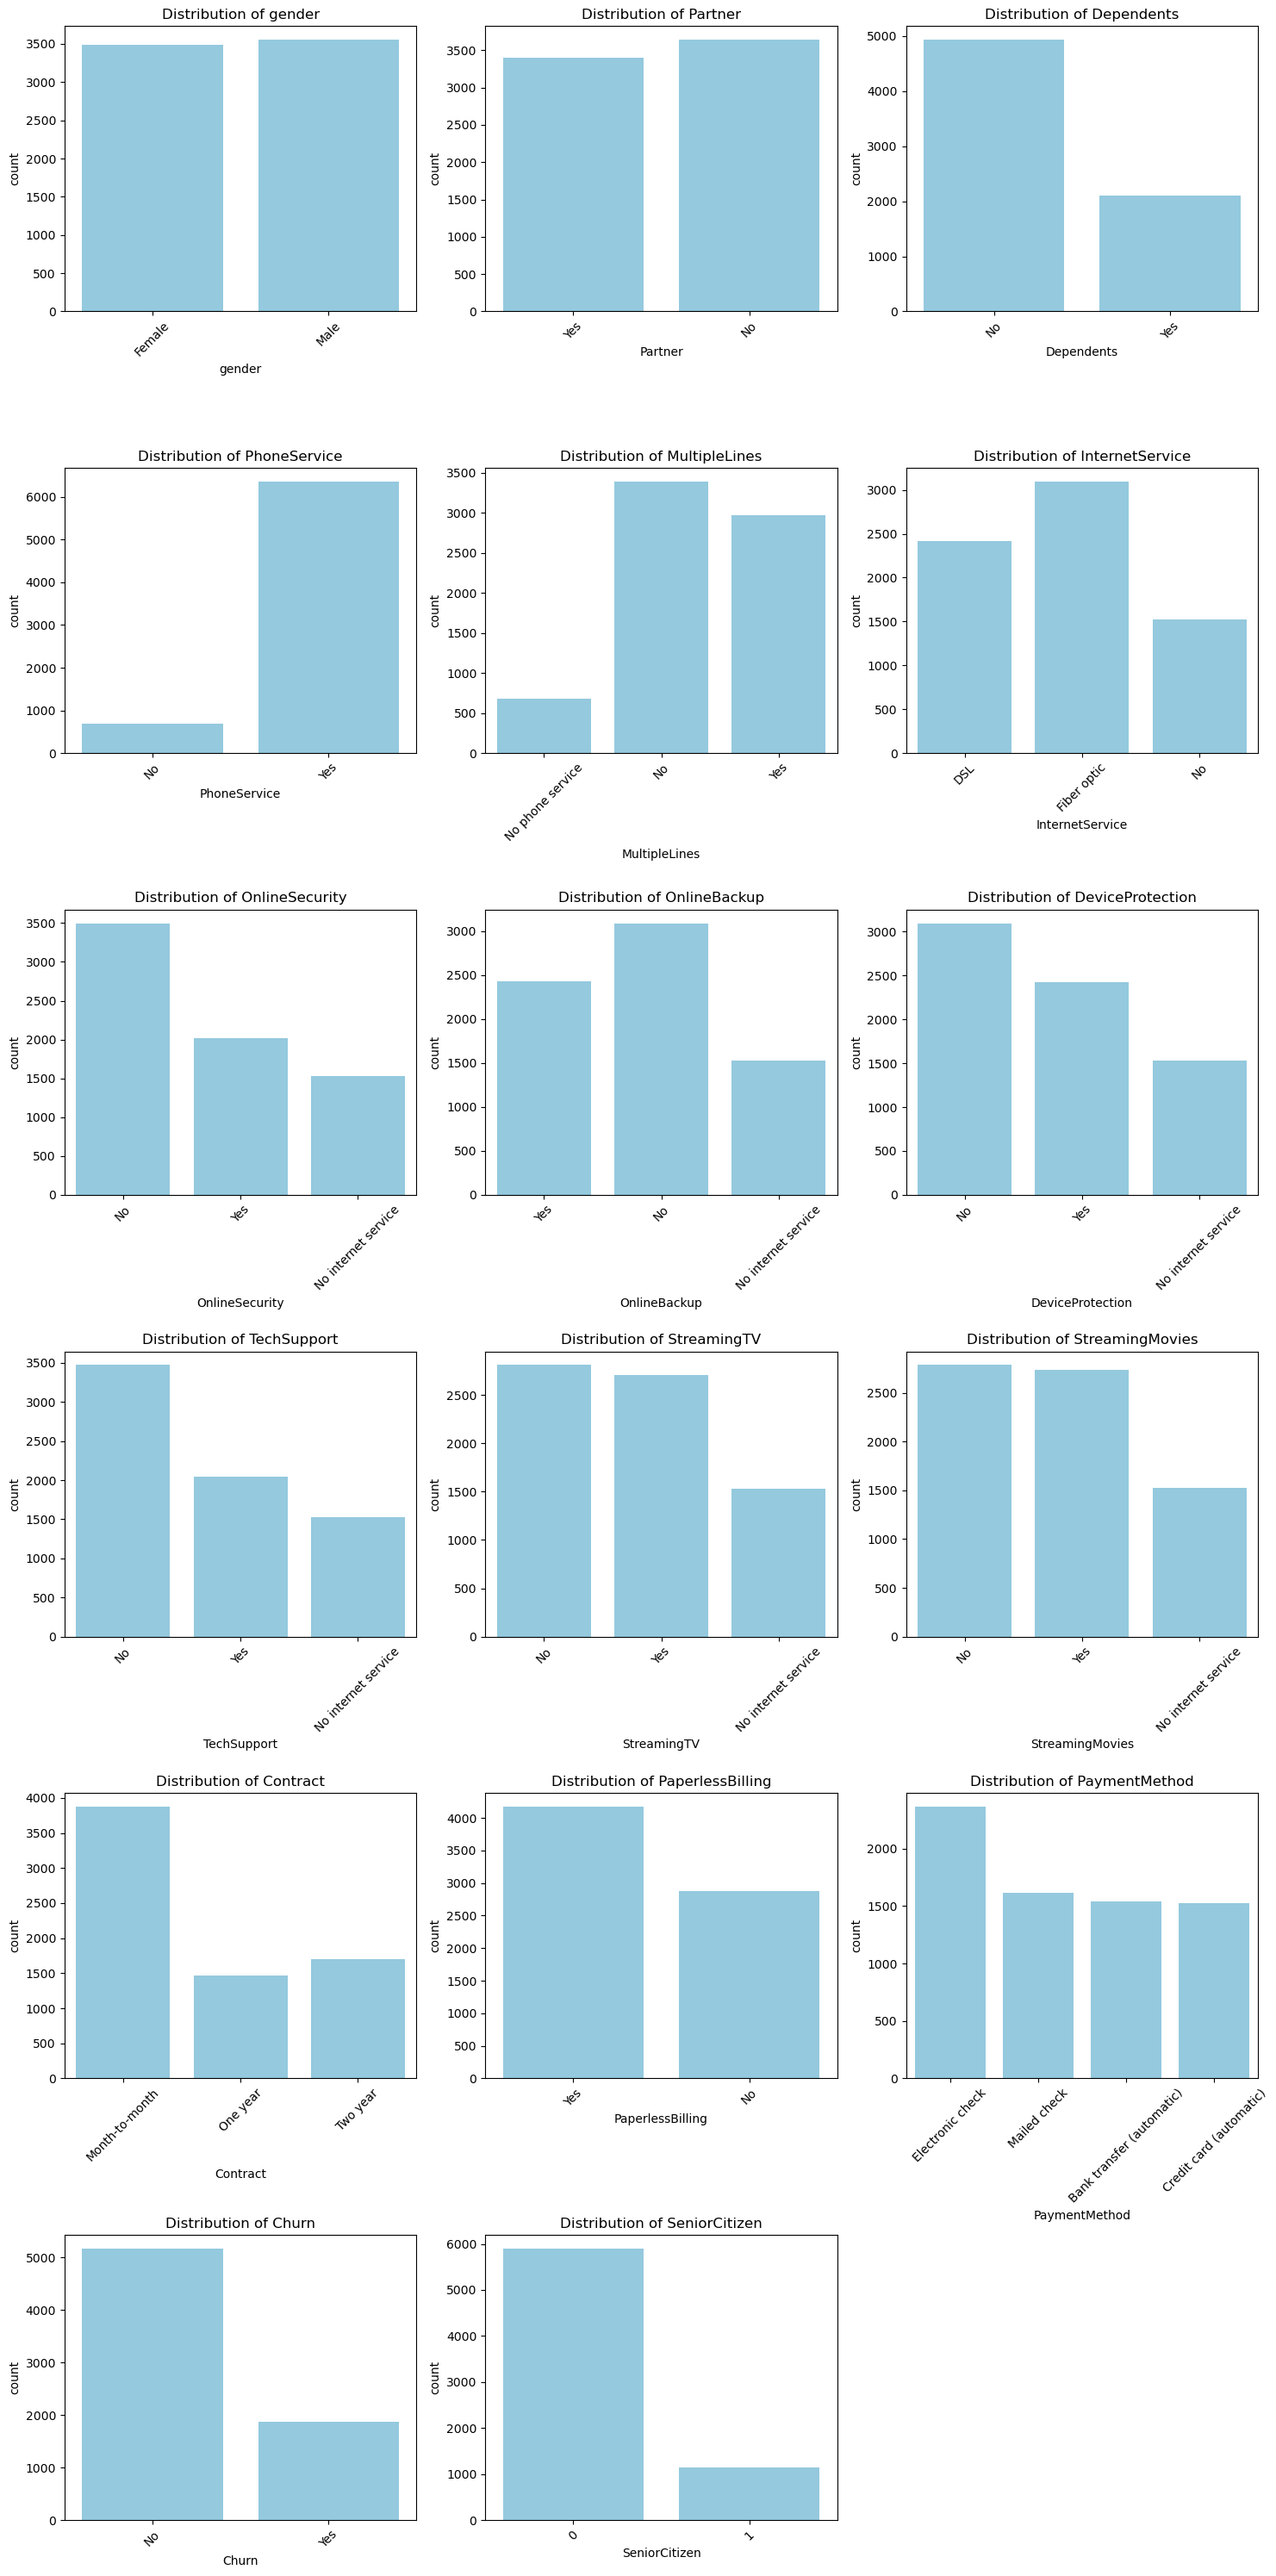

In [19]:
categorical_columns = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 
    'MultipleLines', 'InternetService', 'OnlineSecurity', 
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 
    'StreamingTV', 'StreamingMovies', 'Contract', 
    'PaperlessBilling', 'PaymentMethod', 'Churn', 'SeniorCitizen'
]

for col in categorical_columns:
    print(f"Value counts for {col}:\n", eda_data[col].value_counts(), "\n")

# Set the number of rows and columns for subplots
num_cols = 3  # Adjust the number of columns based on how you want the layout
num_rows = (len(categorical_columns) + num_cols - 1) // num_cols  # Calculate the number of rows required

# Set the figure size
plt.figure(figsize=(15, num_rows * 5))

# Loop through the categorical columns and create bar plots
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(x=col, data=eda_data, color='skyblue')  # Removed palette and set a single color
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)  # Rotate x-ticks for better readability

plt.tight_layout()
plt.show()

### Proportion Analysis

Objective: Understand the proportion of each category within the target variable.

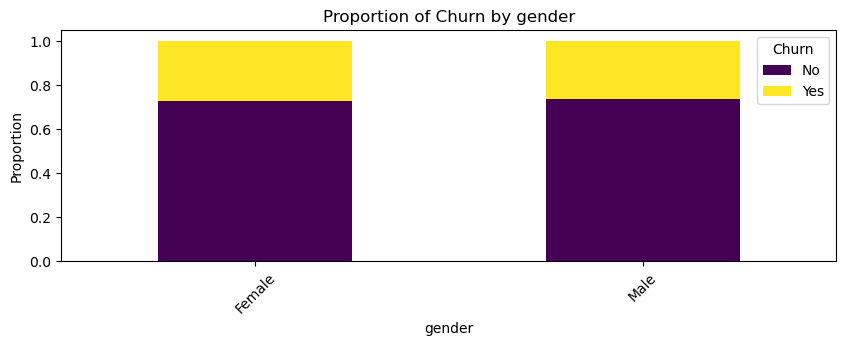

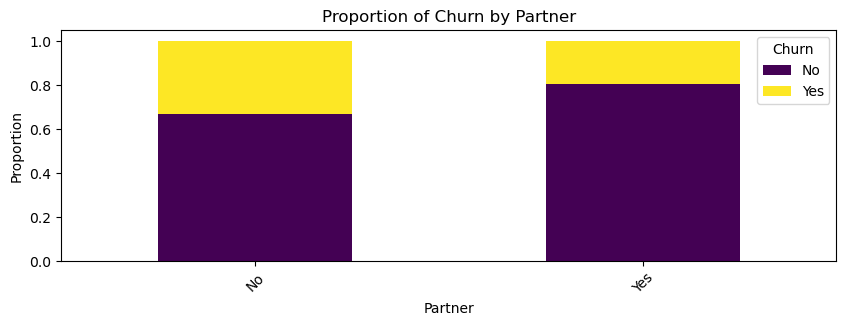

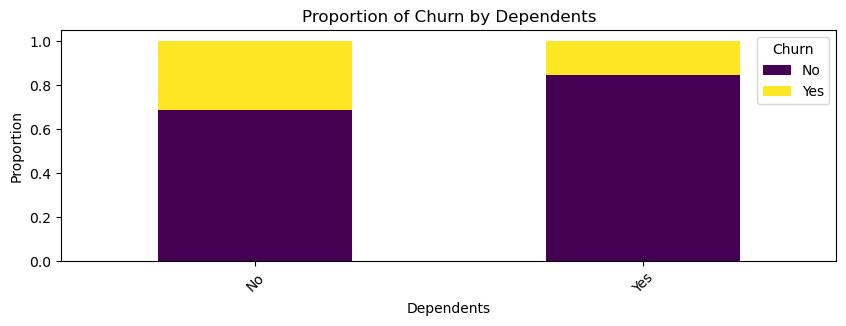

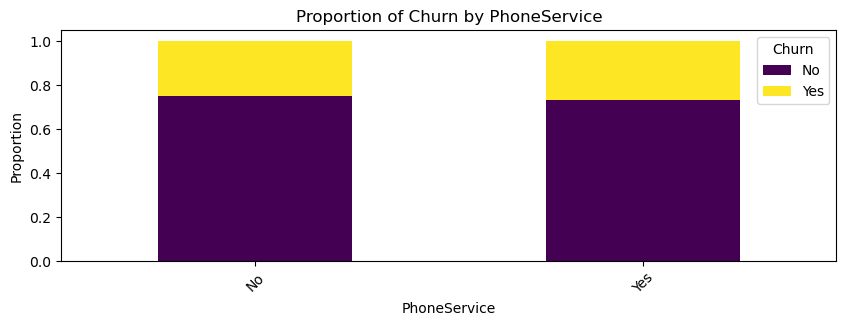

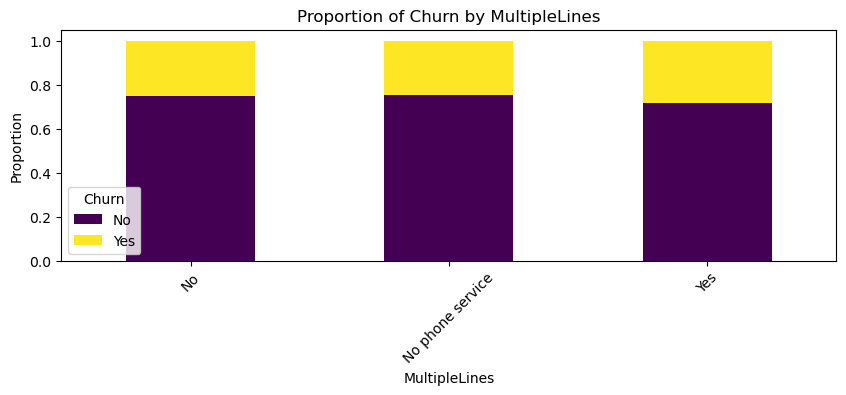

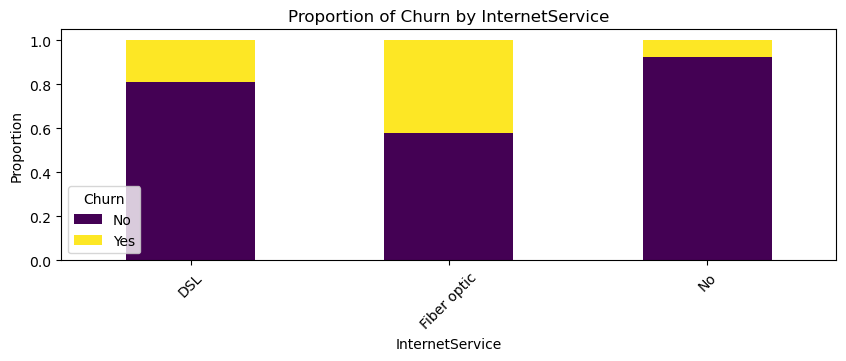

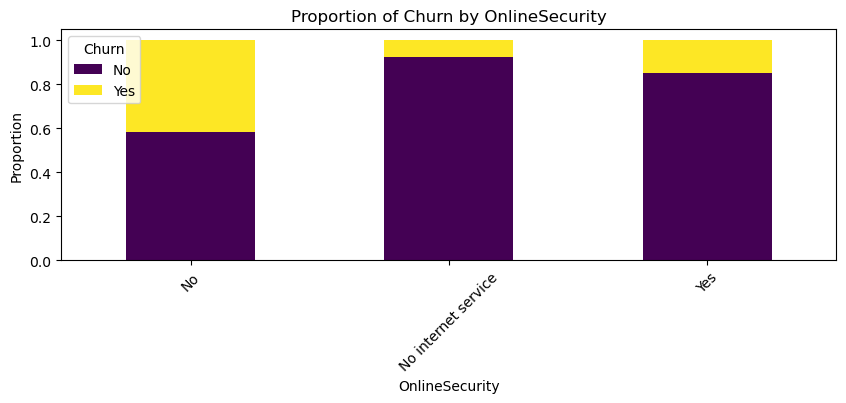

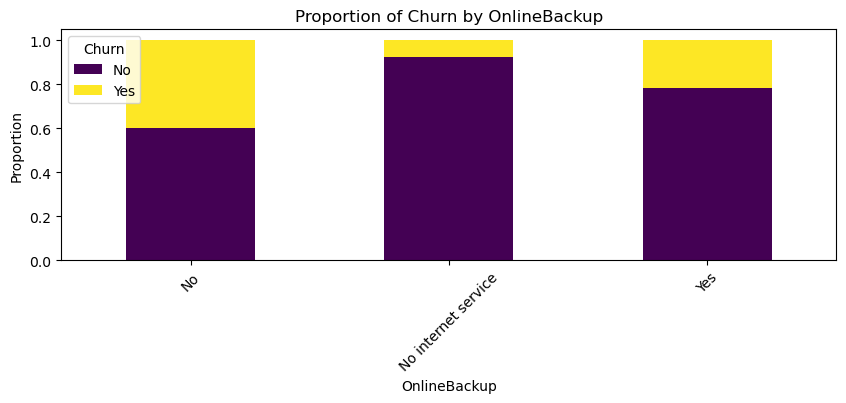

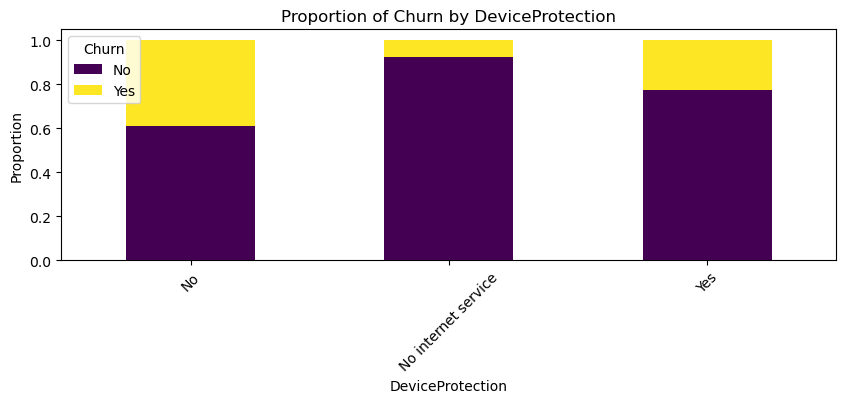

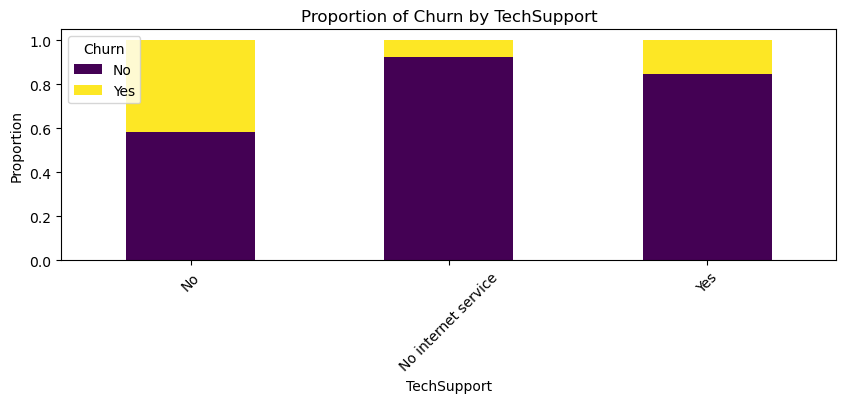

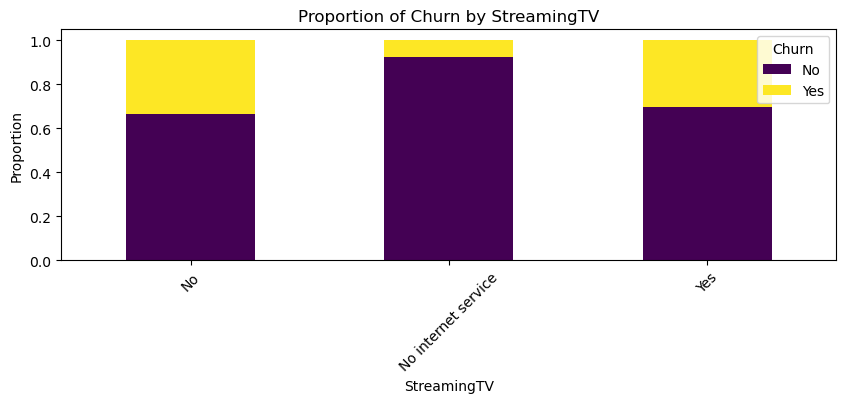

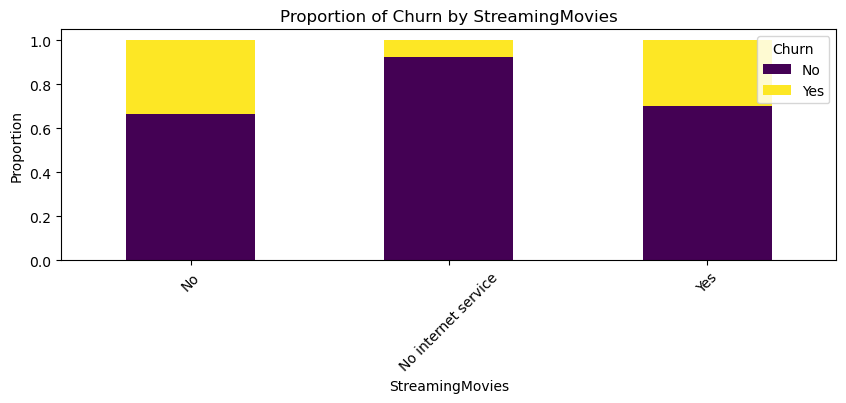

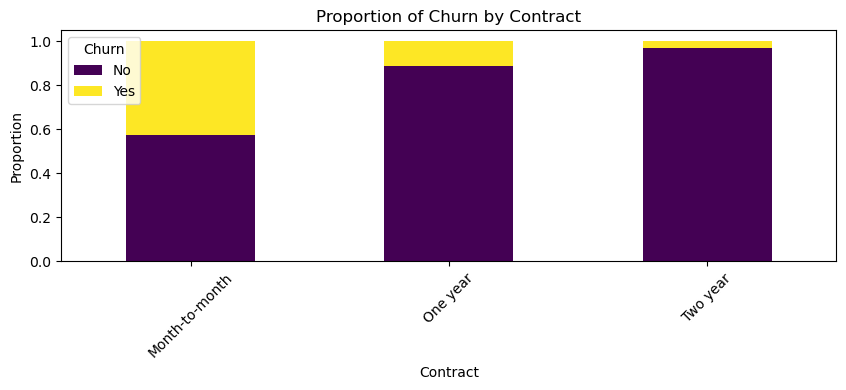

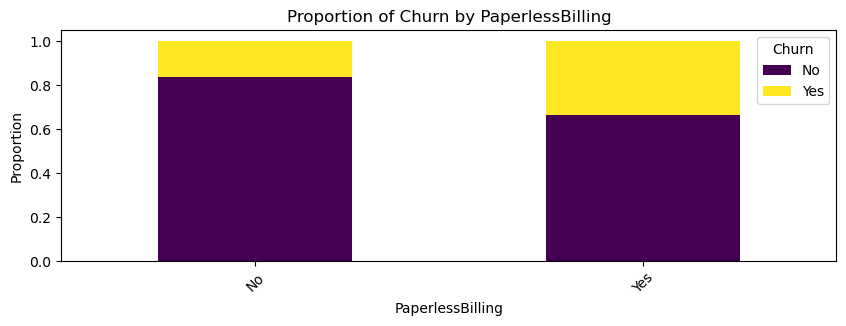

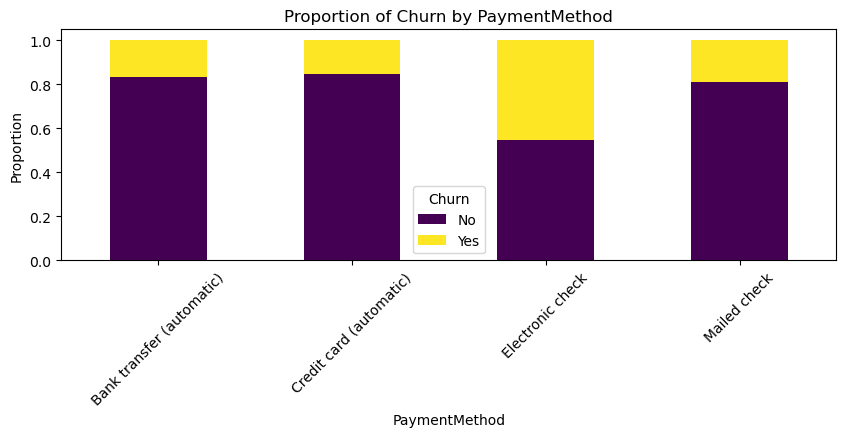

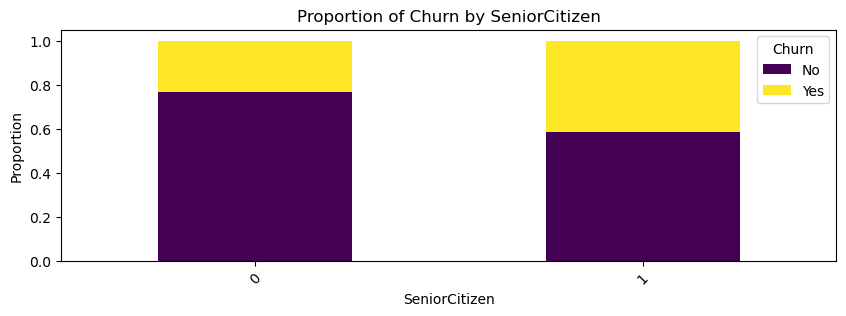

In [20]:
categorical_columns = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 
    'MultipleLines', 'InternetService', 'OnlineSecurity', 
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 
    'StreamingTV', 'StreamingMovies', 'Contract', 
    'PaperlessBilling', 'PaymentMethod', 'SeniorCitizen'
]

# Loop through each column to calculate and plot the proportion of churn
for col in categorical_columns:
    # Calculate the proportion of churn within each category
    churn_by_category = eda_data.groupby(col)['Churn'].value_counts(normalize=True).unstack()
    
    # Plot the stacked bar plot
    churn_by_category.plot(kind='bar', stacked=True, figsize=(10, 3), colormap='viridis')
    plt.title(f'Proportion of Churn by {col}')
    plt.ylabel('Proportion')
    plt.xticks(rotation=45)
    plt.show()

### Cross-Tabulation

Objective: Explore the relationship between two or more categorical variables.

Cross-tabulation between gender and Churn:
 Churn     No  Yes
gender           
Female  2549  939
Male    2625  930 



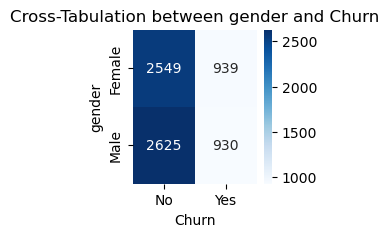

Cross-tabulation between Partner and Churn:
 Churn      No   Yes
Partner            
No       2441  1200
Yes      2733   669 



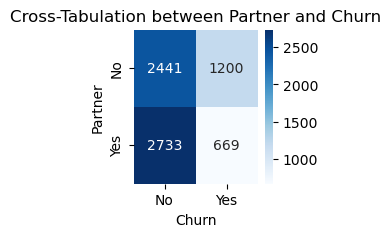

Cross-tabulation between Dependents and Churn:
 Churn         No   Yes
Dependents            
No          3390  1543
Yes         1784   326 



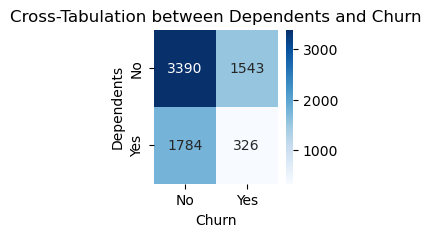

Cross-tabulation between PhoneService and Churn:
 Churn           No   Yes
PhoneService            
No             512   170
Yes           4662  1699 



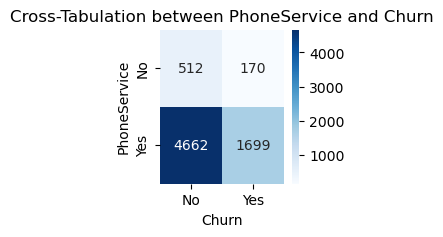

Cross-tabulation between MultipleLines and Churn:
 Churn               No  Yes
MultipleLines              
No                2541  849
No phone service   512  170
Yes               2121  850 



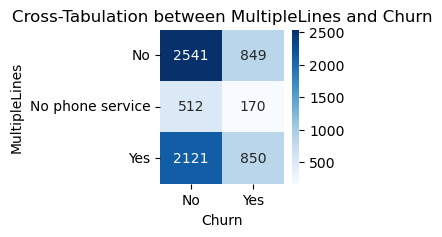

Cross-tabulation between InternetService and Churn:
 Churn              No   Yes
InternetService            
DSL              1962   459
Fiber optic      1799  1297
No               1413   113 



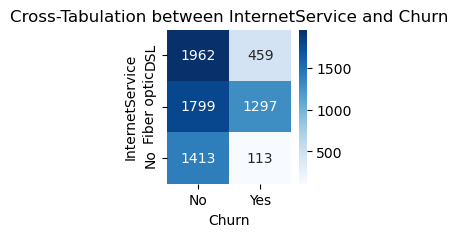

Cross-tabulation between OnlineSecurity and Churn:
 Churn                  No   Yes
OnlineSecurity                 
No                   2037  1461
No internet service  1413   113
Yes                  1724   295 



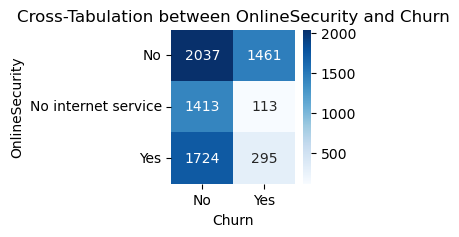

Cross-tabulation between OnlineBackup and Churn:
 Churn                  No   Yes
OnlineBackup                   
No                   1855  1233
No internet service  1413   113
Yes                  1906   523 



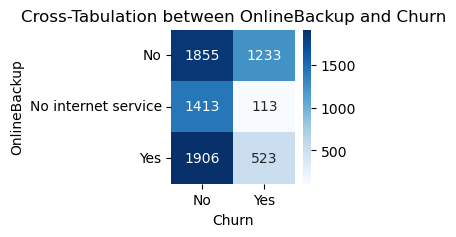

Cross-tabulation between DeviceProtection and Churn:
 Churn                  No   Yes
DeviceProtection               
No                   1884  1211
No internet service  1413   113
Yes                  1877   545 



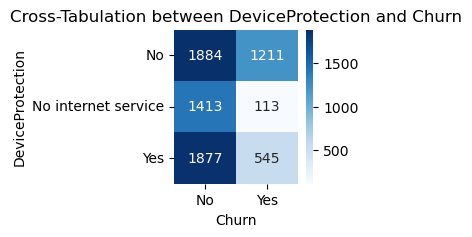

Cross-tabulation between TechSupport and Churn:
 Churn                  No   Yes
TechSupport                    
No                   2027  1446
No internet service  1413   113
Yes                  1734   310 



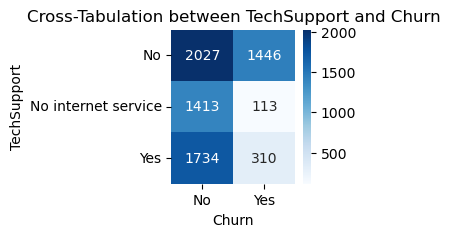

Cross-tabulation between StreamingTV and Churn:
 Churn                  No  Yes
StreamingTV                   
No                   1868  942
No internet service  1413  113
Yes                  1893  814 



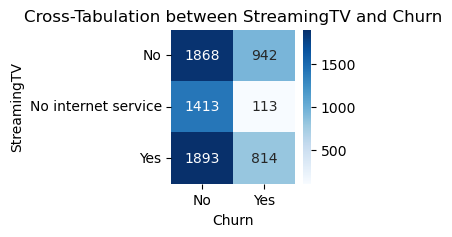

Cross-tabulation between StreamingMovies and Churn:
 Churn                  No  Yes
StreamingMovies               
No                   1847  938
No internet service  1413  113
Yes                  1914  818 



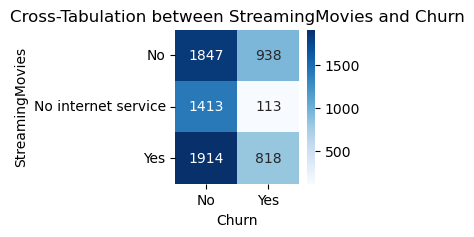

Cross-tabulation between Contract and Churn:
 Churn             No   Yes
Contract                  
Month-to-month  2220  1655
One year        1307   166
Two year        1647    48 



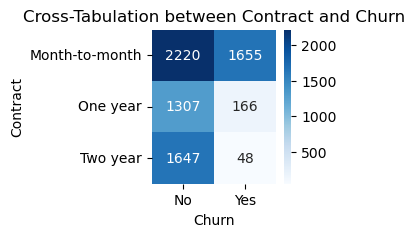

Cross-tabulation between PaperlessBilling and Churn:
 Churn               No   Yes
PaperlessBilling            
No                2403   469
Yes               2771  1400 



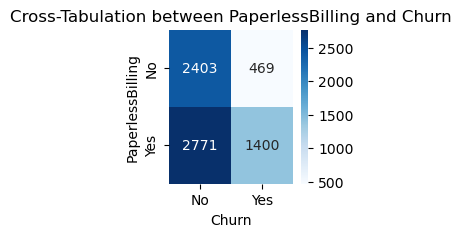

Cross-tabulation between PaymentMethod and Churn:
 Churn                        No   Yes
PaymentMethod                        
Bank transfer (automatic)  1286   258
Credit card (automatic)    1290   232
Electronic check           1294  1071
Mailed check               1304   308 



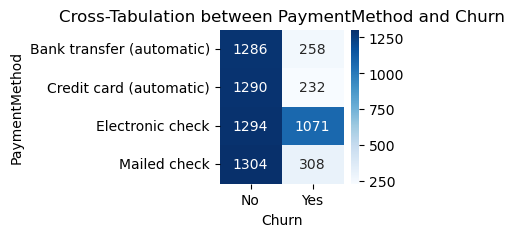

Cross-tabulation between SeniorCitizen and Churn:
 Churn            No   Yes
SeniorCitizen            
0              4508  1393
1               666   476 



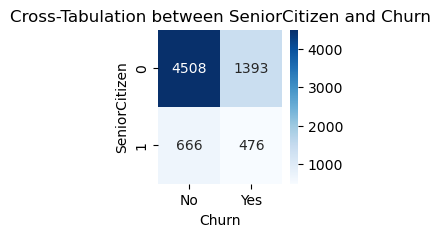

In [21]:
# List of categorical columns excluding 'Churn'
categorical_columns = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 
    'MultipleLines', 'InternetService', 'OnlineSecurity', 
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 
    'StreamingTV', 'StreamingMovies', 'Contract', 
    'PaperlessBilling', 'PaymentMethod', 'SeniorCitizen'
]

# Loop through each categorical feature and plot cross-tabulation with 'Churn'
for col in categorical_columns:
    # Cross-tabulation between the feature and 'Churn'
    crosstab = pd.crosstab(eda_data[col], eda_data['Churn'])
    print(f"Cross-tabulation between {col} and Churn:\n", crosstab, "\n")
    
    # Plot heatmap
    plt.figure(figsize=(2, 2))
    sns.heatmap(crosstab, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Cross-Tabulation between {col} and Churn')
    plt.xlabel('Churn')
    plt.ylabel(col)
    plt.show()

### Chi-Square Test for Independence

Objective: Determine if there is a significant association between two categorical variables.

**Interpretation: If the p-value is less than a significance level (e.g., 0.05), you can conclude that there is a statistically significant association between the two categorical variables.**

In [22]:
from scipy.stats import chi2_contingency

# List of categorical columns excluding 'Churn'
categorical_columns = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 
    'MultipleLines', 'InternetService', 'OnlineSecurity', 
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 
    'StreamingTV', 'StreamingMovies', 'Contract', 
    'PaperlessBilling', 'PaymentMethod', 'SeniorCitizen'
]

# Loop through each categorical feature and perform Chi-square test with 'Churn'
for col in categorical_columns:
    # Cross-tabulation between the feature and 'Churn'
    crosstab = pd.crosstab(eda_data[col], eda_data['Churn'])
    
    # Perform Chi-square test
    chi2, p, dof, ex = chi2_contingency(crosstab)
    
    # Display the results
    print(f"Chi-square test between {col} and Churn:")
    print(f"Chi-square test statistic: {chi2:.4f}, p-value: {p:.4f}")
    print(f"Degrees of freedom: {dof}")
    print(f"Expected frequencies:\n{ex}\n")

Chi-square test between gender and Churn:
Chi-square test statistic: 0.4841, p-value: 0.4866
Degrees of freedom: 1
Expected frequencies:
[[2562.38989067  925.61010933]
 [2611.61010933  943.38989067]]

Chi-square test between Partner and Churn:
Chi-square test statistic: 158.7334, p-value: 0.0000
Degrees of freedom: 1
Expected frequencies:
[[2674.78830044  966.21169956]
 [2499.21169956  902.78830044]]

Chi-square test between Dependents and Churn:
Chi-square test statistic: 189.1292, p-value: 0.0000
Degrees of freedom: 1
Expected frequencies:
[[3623.93042737 1309.06957263]
 [1550.06957263  559.93042737]]

Chi-square test between PhoneService and Churn:
Chi-square test statistic: 0.9150, p-value: 0.3388
Degrees of freedom: 1
Expected frequencies:
[[ 501.01774812  180.98225188]
 [4672.98225188 1688.01774812]]

Chi-square test between MultipleLines and Churn:
Chi-square test statistic: 11.3304, p-value: 0.0035
Degrees of freedom: 2
Expected frequencies:
[[2490.39613801  899.60386199]
 [ 50

### Clustering Analysis on Categorical Data

Objective: Group customers into segments based on categorical features.

In [23]:
from kmodes.kmodes import KModes

# Example: Apply k-modes clustering
km = KModes(n_clusters=3, init='Huang', n_init=5, verbose=1)
clusters = km.fit_predict(eda_data[categorical_columns])
eda_data['Cluster'] = clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 989, cost: 32888.0
Run 1, iteration: 2/100, moves: 514, cost: 32394.0
Run 1, iteration: 3/100, moves: 138, cost: 32394.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 2167, cost: 34376.0
Run 2, iteration: 2/100, moves: 2225, cost: 32572.0
Run 2, iteration: 3/100, moves: 430, cost: 32323.0
Run 2, iteration: 4/100, moves: 64, cost: 32323.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 2600, cost: 32323.0
Run 3, iteration: 2/100, moves: 315, cost: 32323.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 1937, cost: 41320.0
Run 4, iteration: 2/100, moves: 165, cost: 41320.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 2230

### Bivariate Analysis: Categorical vs. Categorical

Objective: Explore the interaction between two categorical features.

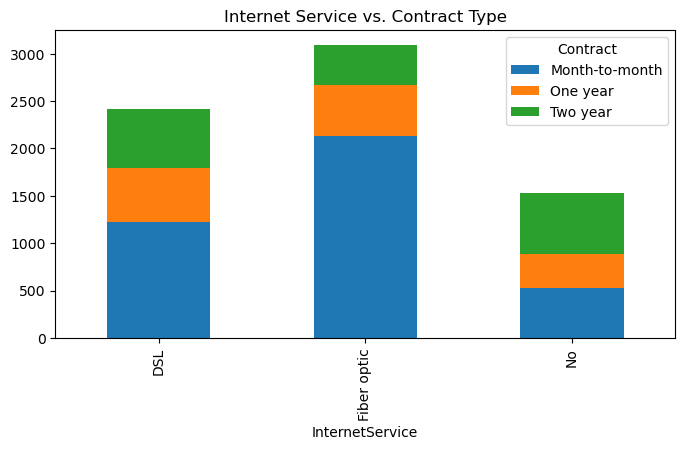

In [24]:
# Example: Relationship between 'InternetService' and 'Contract'
cross_tab = pd.crosstab(eda_data['InternetService'], eda_data['Contract'])
cross_tab.plot(kind='bar', stacked=True, figsize=(8, 4))
plt.title('Internet Service vs. Contract Type')
plt.show()

### Check for Class Imbalance

In [28]:
eda_data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64